In [1]:
import pandas as pd

In [2]:
from dotenv import load_dotenv
load_dotenv('../../extractors/.env')

True

In [3]:
import boto3
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_10_perc.json", "preds_labels_10_perc.json")

In [ ]:
import boto3
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_10_perc.json", "preds_labels_10_perc.json")

In [7]:
df = pd.read_json("preds_labels_comedy_10_perc.json")

In [42]:
df.columns.tolist()

['sQDrj7JOAYQ',
 'uCSqeI29D_I',
 'VeYRaOV0I_Y',
 'w6OJl42Ntko',
 'WA4a8ouaars',
 'WA5_ledA_9k',
 'wdAva6xBjOQ',
 'xYQ28eu35gI',
 'YpjwHazhknA']

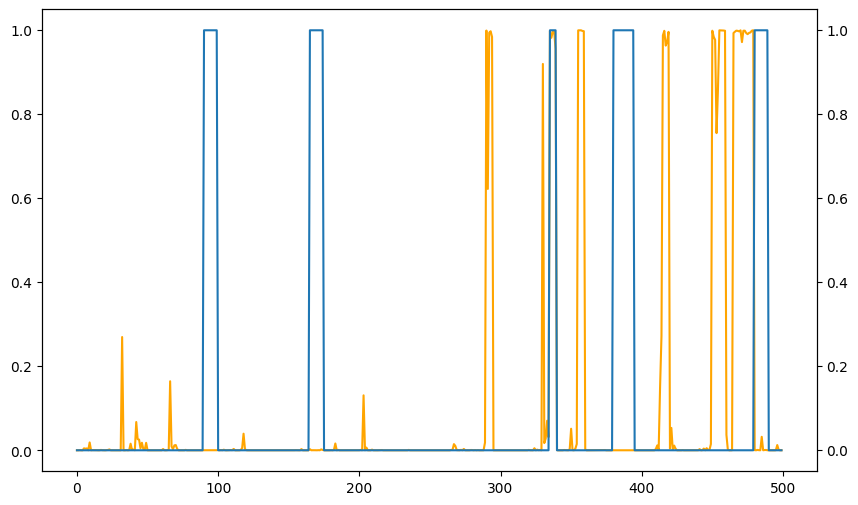

In [7]:
import matplotlib.pyplot as plt
vid_id = 'p39rR4nLJV0'
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange')
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'])


In [4]:
from importlib import reload
import metrics as m
reload(m)

# mc = m.MetricCalculator(df, top_k=5)
# top_5 = mc.metrics

<module 'metrics' from 'C:\\Users\\jzmuj\\Desktop\\uczelnia\\magisterka\\youtube-downloader\\notebooks\\metrics.py'>

In [100]:
top_5

,index,threshold,value
0,f1,7.302340e-02,0.188285
1,accuracy,9.999661e-01,0.907263
2,precision,9.917676e-01,0.248408
3,recall,3.358031e-08,1.000000
4,kappa,6.668185e-01,0.090101
0,roc_auc,NaN,0.570737
1,average_precision,NaN,0.129459
0,accuracy_top5,8.366333e-01,0.263158
1,f1_top5,8.366333e-01,0.416667
2,kappa_top5,8.366333e-01,0.000000


In [101]:
from importlib import reload
import metrics as m
reload(m)

mc = m.MetricCalculator(df, top_k=25)
top_25 = mc.metrics

2024-09-22 21:52:39.926 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-22 21:52:39.927 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 25 moments from DataFrame
2024-09-22 21:52:39.939 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-22 21:57:08.152 | INFO     | metrics:maximize_class_metrics:122 - Maximizing class metrics
2024-09-22 21:57:08.154 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-22 21:57:08.165 | INFO     | metrics:get_top_k_metrics:107 - Calculating metrics for top 25 moments
2024-09-22 21:57:08.166 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-22 21:57:08.172 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


In [102]:
top_25

,index,threshold,value
0,f1,7.302340e-02,0.188285
1,accuracy,9.999661e-01,0.907263
2,precision,9.917676e-01,0.248408
3,recall,3.358031e-08,1.000000
4,kappa,6.668185e-01,0.090101
0,roc_auc,NaN,0.570737
1,average_precision,NaN,0.129459
0,accuracy_top25,3.608802e-01,0.212632
1,f1_top25,3.608802e-01,0.350694
2,kappa_top25,3.608802e-01,0.000000


In [15]:
all_metrics = []
for highlight_rt in ['preds_labels_comedy_10_perc',
 'preds_labels_comedy_15_perc',
 'preds_labels_comedy_20_perc',
 'preds_labels_comedy_25_perc',
 'preds_labels_comedy_30_perc',
 'preds_labels_comedy_3_perc',
 'preds_labels_comedy_1_std',
 'preds_labels_comedy_1_5_std',
 'preds_labels_comedy_2_std',
 'preds_labels_comedy_2_5_std',   
]:
    boto3.resource("s3").Bucket("auto-shorts").download_file(f"data/{highlight_rt}.json", f"{highlight_rt}.json")
    df = pd.read_json(f"{highlight_rt}.json")
    for col in df.columns.tolist():
        if len(df[col]['preds']) != len(df[col]['labels']):
            print(f"Skipping {col}")
            df = df.drop(col, axis=1)
    all_metrics.append(m.MetricCalculator(df).metrics.assign(highlight_ratio=highlight_rt))
    print(f"Done with {highlight_rt}")

2024-09-24 12:03:13.965 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:03:13.966 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:03:13.969 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:04:22.281 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:04:22.284 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:04:22.292 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:04:22.292 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:04:22.300 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_10_perc


2024-09-24 12:04:23.559 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:04:23.560 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:04:23.563 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:05:32.180 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:05:32.183 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:05:32.189 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:05:32.190 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:05:32.196 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_15_perc


2024-09-24 12:05:33.555 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:05:33.556 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:05:33.559 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:06:43.154 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:06:43.157 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:06:43.162 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:06:43.162 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:06:43.167 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_20_perc


2024-09-24 12:06:44.480 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:06:44.481 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:06:44.485 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:07:53.091 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:07:53.093 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:07:53.100 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:07:53.100 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:07:53.106 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_25_perc


2024-09-24 12:07:54.730 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:07:54.730 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:07:54.733 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:09:04.491 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:09:04.494 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:09:04.499 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:09:04.500 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:09:04.506 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_30_perc


2024-09-24 12:09:05.841 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:09:05.842 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:09:05.845 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:10:14.264 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:10:14.267 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:10:14.275 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:10:14.275 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:10:14.282 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_3_perc


2024-09-24 12:10:15.675 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:10:15.676 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:10:15.679 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:11:24.761 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:11:24.764 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:11:24.771 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:11:24.771 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:11:24.777 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_1_std


2024-09-24 12:11:26.224 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:11:26.225 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:11:26.229 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:12:34.659 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:12:34.661 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:12:34.666 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:12:34.667 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:12:34.675 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_1_5_std


2024-09-24 12:12:35.986 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:12:35.987 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:12:35.992 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:13:44.593 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:13:44.595 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:13:44.603 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:13:44.604 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:13:44.612 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_2_std


2024-09-24 12:13:45.953 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-09-24 12:13:45.954 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-09-24 12:13:45.957 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-09-24 12:14:53.649 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-09-24 12:14:53.651 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-09-24 12:14:53.657 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-09-24 12:14:53.658 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-09-24 12:14:53.664 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_2_5_std


In [16]:
all_metrics = pd.concat(all_metrics)
all_metrics
# all_metrics.to_csv("../data/metrics_sport_vids.csv", index=False)

,index,threshold,value,highlight_ratio
0,f1,0.132798,0.209651,preds_labels_comedy_10_perc
1,accuracy,0.646356,0.906444,preds_labels_comedy_10_perc
2,precision,0.171219,0.179348,preds_labels_comedy_10_perc
3,recall,0.002414,1.000000,preds_labels_comedy_10_perc
4,kappa,0.132798,0.100402,preds_labels_comedy_10_perc
...,...,...,...,...
2,kappa_top5,0.064710,0.000000,preds_labels_comedy_2_5_std
3,precision_top5,0.064710,0.111111,preds_labels_comedy_2_5_std
4,recall_top5,0.064710,1.000000,preds_labels_comedy_2_5_std
0,roc_auc_top5,NaN,0.675000,preds_labels_comedy_2_5_std


In [17]:
all_metrics[(all_metrics['index'] == 'average_precision') | (all_metrics['index'] == 'average_precision_top5')]

,index,threshold,value,highlight_ratio
1,average_precision,NaN,0.126923,preds_labels_comedy_10_perc
1,average_precision_top5,NaN,0.219606,preds_labels_comedy_10_perc
1,average_precision,NaN,0.209299,preds_labels_comedy_15_perc
1,average_precision_top5,NaN,0.460697,preds_labels_comedy_15_perc
1,average_precision,NaN,0.252007,preds_labels_comedy_20_perc
1,average_precision_top5,NaN,0.448494,preds_labels_comedy_20_perc
1,average_precision,NaN,0.286220,preds_labels_comedy_25_perc
1,average_precision_top5,NaN,0.551132,preds_labels_comedy_25_perc
1,average_precision,NaN,0.335662,preds_labels_comedy_30_perc
1,average_precision_top5,NaN,0.728504,preds_labels_comedy_30_perc


In [18]:
all_metrics[(all_metrics['index'] == 'f1') | (all_metrics['index'] == 'f1_top5')]

,index,threshold,value,highlight_ratio
0,f1,0.132798,0.209651,preds_labels_comedy_10_perc
1,f1_top5,0.216913,0.474576,preds_labels_comedy_10_perc
0,f1,0.146242,0.285714,preds_labels_comedy_15_perc
1,f1_top5,0.213875,0.548387,preds_labels_comedy_15_perc
0,f1,0.175981,0.324117,preds_labels_comedy_20_perc
1,f1_top5,0.541630,0.524590,preds_labels_comedy_20_perc
0,f1,0.031229,0.387653,preds_labels_comedy_25_perc
1,f1_top5,0.497206,0.636364,preds_labels_comedy_25_perc
0,f1,0.010218,0.449767,preds_labels_comedy_30_perc
1,f1_top5,0.708204,0.750000,preds_labels_comedy_30_perc


In [19]:
all_metrics.to_csv("../data/metrics_comedy_vids.csv", index=False)

In [22]:
metrics_sports = pd.read_csv("../data/metrics_sport_vids.csv")
metrics_sports[(metrics_sports['index'] == 'average_precision') | (metrics_sports['index'] == 'average_precision_top5')]

,index,threshold,value,highlight_ratio
6,average_precision,NaN,0.129459,preds_labels_10_perc
13,average_precision_top5,NaN,0.243900,preds_labels_10_perc
20,average_precision,NaN,0.190677,preds_labels_15_perc
27,average_precision_top5,NaN,0.519450,preds_labels_15_perc
34,average_precision,NaN,0.213430,preds_labels_20_perc
41,average_precision_top5,NaN,0.432466,preds_labels_20_perc
48,average_precision,NaN,0.241969,preds_labels_25_perc
55,average_precision_top5,NaN,0.349986,preds_labels_25_perc
62,average_precision,NaN,0.322803,preds_labels_30_perc
69,average_precision_top5,NaN,0.658278,preds_labels_30_perc


In [23]:
metrics_sports[(metrics_sports['index'] == 'f1') | (metrics_sports['index'] == 'f1_top5')]


,index,threshold,value,highlight_ratio
0,f1,7.302340e-02,0.188285,preds_labels_10_perc
8,f1_top5,8.366333e-01,0.416667,preds_labels_10_perc
14,f1,7.974493e-04,0.261606,preds_labels_15_perc
22,f1_top5,9.038951e-01,0.571429,preds_labels_15_perc
28,f1,8.189845e-06,0.322532,preds_labels_20_perc
36,f1_top5,9.654601e-01,0.515625,preds_labels_20_perc
42,f1,4.917386e-07,0.387509,preds_labels_25_perc
50,f1_top5,9.972608e-01,0.480000,preds_labels_25_perc
56,f1,1.460427e-08,0.451618,preds_labels_30_perc
64,f1_top5,9.982424e-01,0.689655,preds_labels_30_perc


In [96]:
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_comedy_30_perc.json", "preds_labels_comedy_30_perc.json")
df = pd.read_json("preds_labels_comedy_30_perc.json")

In [97]:
df.columns

Index(['sQDrj7JOAYQ', 'u6g41E3RaYo', 'uCSqeI29D_I', 'VeYRaOV0I_Y',
       'w6OJl42Ntko', 'WA4a8ouaars', 'WA5_ledA_9k', 'wdAva6xBjOQ',
       'xYQ28eu35gI', 'YecCEmjLSmY', 'YpjwHazhknA'],
      dtype='object')

In [98]:
import sys
sys.path.append('../auto_shorts/upload/db')
from utils import postgres_engine

In [102]:
vid_id = 'xYQ28eu35gI'

In [103]:
import json
vid_path = pd.read_sql('select s3_path from videos where id = %s', con=postgres_engine, params=(vid_id,)).iloc[0,0]
boto3.resource("s3").Bucket("auto-shorts").download_file(f"{vid_path}/video_data.json", "video_data.json")
with open("video_data.json") as f:
    moments = pd.DataFrame(
                    json.load(f)["most_watched_moments"]
                )
watched_score = pd.concat([moments, moments.assign(time_start_ms=moments['time_start_ms']+1), moments.assign(time_start_ms=moments['time_start_ms']+2), moments.assign(time_start_ms=moments['time_start_ms']+3), moments.assign(time_start_ms=moments['time_start_ms']+4)]).sort_values('time_start_ms').reset_index()['intensity_score']

In [104]:
import heapq
preds_vid = heapq.nlargest(5, df[vid_id].loc["preds"])
indices_vid = [df[vid_id].loc["preds"].index(p) for p in preds_vid]

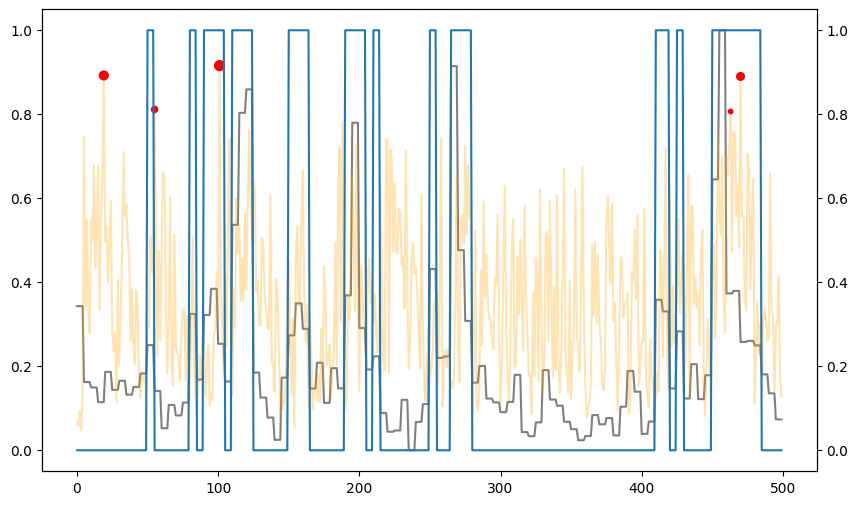

In [106]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(watched_score, color='grey')
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange', alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'])
ax2.scatter(indices_vid, preds_vid, color='red', s=[50-i*10 for i in range(5)])